## Analise de medidas de variabilidade e medidas resumo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [4]:
dfTeste = pd.read_excel("database.xlsx")
# dfTeste = dfTeste.drop(columns='Unnamed: 0')
# dfTeste.to_csv("dados.csv", sep=',', encoding= 'latin-1', index = False)

In [102]:
df = pd.read_excel("base_musical.xlsx")
df = df.drop(columns='Unnamed: 0')
df = df.rename(columns={'tempo': 'BPM'})

In [103]:
df

,artista,musica,dancabilidade,energia,chave,volume,presenca_palavras,acustica,instrumentalidade,ao_vivo,positividade,BPM,duracao_ms,genero
0,Harry Styles,As It Was,0.520,0.731,6,-5.338,0.0557,0.342000,0.001010,0.3110,0.662,173.930,167303,Pop
1,"Bizarrap, Quevedo","Quevedo: Bzrp Music Sessions, Vol. 52",0.621,0.782,2,-5.548,0.0440,0.012500,0.033000,0.2300,0.550,128.033,198938,Hip-Hop/Rap
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,0.911,0.712,1,-5.105,0.0817,0.090100,0.000027,0.0933,0.425,92.005,178567,Música Latina
3,Bad Bunny,Tití Me Preguntó,0.650,0.715,5,-5.198,0.2530,0.099300,0.000291,0.1260,0.187,106.672,243717,Música Latina
4,BLACKPINK,Pink Venom,0.798,0.697,0,-7.139,0.0891,0.020200,0.000000,0.2590,0.745,90.031,186964,K-Pop
5,Manuel Turizo,La Bachata,0.835,0.679,7,-5.329,0.0364,0.583000,0.000002,0.2180,0.850,124.980,162638,Música Latina Urbana
6,ROSALÍA,DESPECHÁ,0.919,0.623,7,-6.521,0.0992,0.184000,0.000016,0.0609,0.775,130.037,157018,Pop em Espanhol
7,"David Guetta, Bebe Rexha",I'm Good (Blue),0.561,0.965,7,-3.673,0.0343,0.003830,0.000007,0.3710,0.304,128.040,175238,Dance
8,OneRepublic,I Ain't Worried,0.704,0.797,0,-5.927,0.0475,0.082600,0.000745,0.0546,0.825,139.994,148486,Pop
9,Bad Bunny,Efecto,0.801,0.475,7,-8.797,0.0516,0.141000,0.000017,0.0639,0.234,98.047,213061,Música Latina


In [104]:
def lista_simples(lista):
    if isinstance(lista, list):
        return [sub_elem for elem in lista for sub_elem in lista_simples(elem)]
    else:
        return [lista]

def contar(variavel):
    lista_artistas = list(df[variavel])
    artista2 = []
    lista_certa = []
    for artista in lista_artistas:
        if type(artista) == float:
            continue
        if "," in artista:
            artista2.append(artista.split(", "))
        else:
            lista_certa.append(artista)

    artistas2 = lista_simples(artista2)

    for elem in artistas2:
        lista_certa.append(elem)
    dctArtistas = {}
    for artista in lista_certa:
        dctArtistas.update({artista: lista_certa.count(artista)})
    return dctArtistas  

In [105]:
dctContar = contar('genero')
dctContar

{'Pop': 16,
 'Hip-Hop/Rap': 5,
 'Música Latina': 8,
 'K-Pop': 1,
 'Música Latina Urbana': 5,
 'Pop em Espanhol': 2,
 'Dance': 3,
 'R&B/Soul': 4,
 'Indie Pop': 1,
 'Alternativa/Indie': 1,
 'Metal': 1,
 'Alternativo': 3}

In [106]:
dfVariaveis = df[['artista', 'musica', 'dancabilidade', 'ao_vivo', 'duracao_ms', 'chave', 'energia', 'genero']]
dfVariaveis['duracao_ms'] = dfVariaveis['duracao_ms'] / 60000
dfVariaveis = dfVariaveis.rename(columns={'duracao_ms': 'duracao', 'chave': 'tonalidade'})
dfVariaveis = dfVariaveis.round(2)
# dfVariaveis.to_excel("variaveis.xlsx")


C:\Users\julia\AppData\Local\Temp\ipykernel_26200\3692069803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfVariaveis['duracao_ms'] = dfVariaveis['duracao_ms'] / 60000


In [107]:
dfQualitativa = dfVariaveis.copy()
# dfQualitativa.loc[dfVariaveis['duracao'] < 2, 'duracao'] = 'Muito curta'
# dfQualitativa.loc[(dfVariaveis['duracao'] >= 2) & (dfVariaveis['duracao'] < 3.15), 'duracao'] = 'Curta'
# dfQualitativa.loc[(dfVariaveis['duracao'] >= 3.15) & (dfVariaveis['duracao'] < 3.7), 'duracao'] = 'Média'
# dfQualitativa.loc[(dfVariaveis['duracao'] >= 3.7) & (dfVariaveis['duracao'] < 4.5), 'duracao'] = 'Longa'
# dfQualitativa.loc[dfVariaveis['duracao'] >= 4.5, 'duracao'] = 'Muito longa'
dfQualitativa

,artista,musica,dancabilidade,ao_vivo,duracao,tonalidade,energia,genero
0,Harry Styles,As It Was,0.52,0.31,2.79,6,0.73,Pop
1,"Bizarrap, Quevedo","Quevedo: Bzrp Music Sessions, Vol. 52",0.62,0.23,3.32,2,0.78,Hip-Hop/Rap
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,0.91,0.09,2.98,1,0.71,Música Latina
3,Bad Bunny,Tití Me Preguntó,0.65,0.13,4.06,5,0.72,Música Latina
4,BLACKPINK,Pink Venom,0.80,0.26,3.12,0,0.70,K-Pop
5,Manuel Turizo,La Bachata,0.84,0.22,2.71,7,0.68,Música Latina Urbana
6,ROSALÍA,DESPECHÁ,0.92,0.06,2.62,7,0.62,Pop em Espanhol
7,"David Guetta, Bebe Rexha",I'm Good (Blue),0.56,0.37,2.92,7,0.96,Dance
8,OneRepublic,I Ain't Worried,0.70,0.05,2.47,0,0.80,Pop
9,Bad Bunny,Efecto,0.80,0.06,3.55,7,0.48,Música Latina


In [108]:
dfQualitativa.loc[dfVariaveis['ao_vivo'] <= 0.8, 'ao_vivo'] = 'Estúdio'
dfQualitativa.loc[dfVariaveis['ao_vivo'] > 0.8, 'ao_vivo'] = 'Ao Vivo'
dfQualitativa.to_excel("database.xlsx")

In [109]:
media = dfQualitativa.mean(numeric_only=True)
mediana = dfQualitativa.median(numeric_only=True)
variancia = dfQualitativa.var(numeric_only=True)
dp = dfQualitativa.std(numeric_only=True)
coeficiente_variacao = dp / media

dfEstatisticas = dfQualitativa.describe()
dfEstatisticas.loc['mediana'] = mediana
dfEstatisticas.loc['variancia'] = variancia
dfEstatisticas.loc['coeficiente_variacao'] = dfEstatisticas.loc['std'] / dfEstatisticas.loc['mean']

In [110]:
dfModa = dfQualitativa[['ao_vivo','genero','tonalidade']].mode()
dfModa = dfModa.rename_axis('Moda')

In [111]:
dfModa

,ao_vivo,genero,tonalidade
Moda,,,
0,Estúdio,Pop,1


In [112]:
dfEstatisticas= dfEstatisticas.round(2)
dfEstatisticas = dfEstatisticas.drop(columns=['tonalidade'])

In [113]:
dfEstatisticas = dfEstatisticas.rename({'std': 'Desvio Padrão', 'count': 'Quantidade', 'mean':'Média'})

In [114]:
dfEstatisticas

,dancabilidade,duracao,energia
Quantidade,50.00,50.00,50.00
Média,0.70,3.27,0.68
Desvio Padrão,0.14,0.67,0.13
min,0.35,1.62,0.32
25%,0.60,2.86,0.59
50%,0.70,3.20,0.70
75%,0.80,3.85,0.76
max,0.95,4.98,0.96
mediana,0.70,3.20,0.70
variancia,0.02,0.45,0.02


In [115]:
dfEstatisticas.to_excel("estatisticas.xlsx")
dfModa.to_excel("moda.xlsx")


## Gráficos

array([[<AxesSubplot:title={'center':'dancabilidade'}>,
        <AxesSubplot:title={'center':'energia'}>,
        <AxesSubplot:title={'center':'chave'}>],
       [<AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'presenca_palavras'}>,
        <AxesSubplot:title={'center':'acustica'}>],
       [<AxesSubplot:title={'center':'instrumentalidade'}>,
        <AxesSubplot:title={'center':'ao_vivo'}>,
        <AxesSubplot:title={'center':'positividade'}>],
       [<AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'duracao_ms'}>, <AxesSubplot:>]],
      dtype=object)

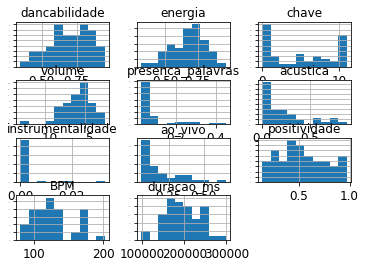

In [116]:
df.hist() 

<AxesSubplot:>

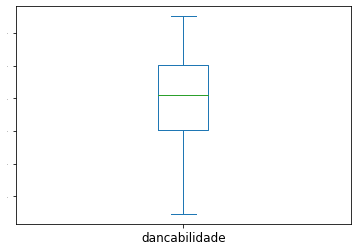

In [117]:
df['dancabilidade'].plot(kind = 'box')

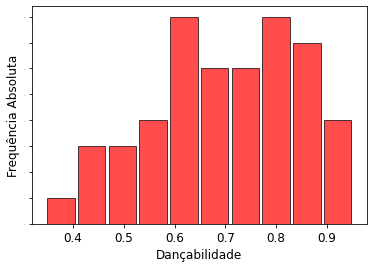

In [118]:
plt.hist(df['dancabilidade'],  rwidth=0.9, color='red', alpha=0.7, edgecolor='black', )
plt.xlabel('Dançabilidade')
plt.ylabel('Frequência Absoluta')
# plt.subplots(figsize =(10, 7))
plt.show()

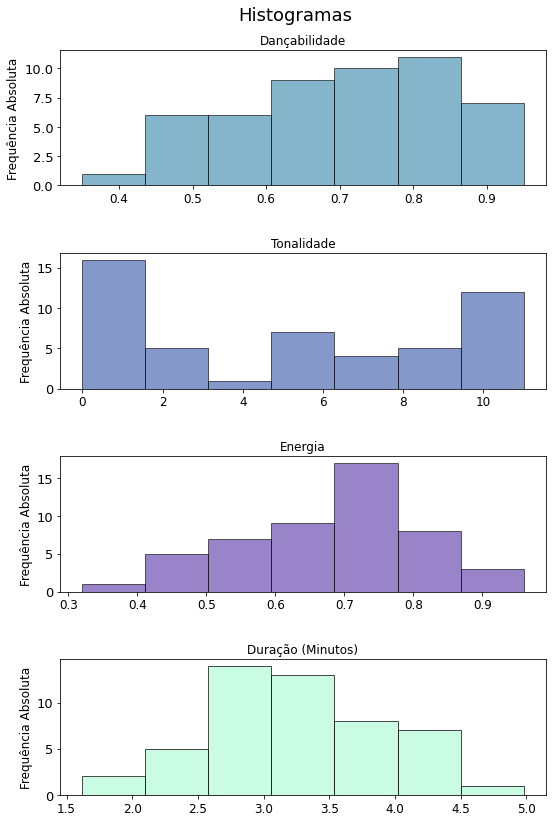

In [130]:
fig = plt.gcf()
fig.set_size_inches(8.7,13.7)
# fig.set_size_inches(8.3,15.7)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize']=12
fig.text(
    x=0.5,
    y=0.91,
    s='Histogramas',
    fontsize = 18,
    horizontalalignment='center',
    color='black')
gs = gridspec.GridSpec(4, 2, hspace=0.5,wspace=0.25)
#SIN
plt.subplot(gs[0, :])
plt.hist(dfVariaveis['dancabilidade'], bins=7, color='#3285a8', alpha=0.6, edgecolor='black') # rwidth=0.9
plt.title("Dançabilidade")
plt.ylabel('Frequência Absoluta')

# plt.grid(True)
# plt.legend(loc='upper center', fontsize=11)

# plt.antonalidadete(
#     'teste',
#     xy=(mes,new_sin_load),
#     color='#143c5a',
#     fontsize = 10,
#     xytext=(0,-20),
#     textcoords='offset points'
# )
# for i, row in last_sin_load['antiga'].iterrows():
#     plt.antonalidadete(
#         str(row['CARGA ANTIGA']),
#         xy=(row['DATA'],row['CARGA ANTIGA']),
#         color='#2fb3c3',
#         fontsize = 10,
#         xytext=(0,10),
#         textcoords='offset points'
#     )

# import math
# import numpy as np
# classes = [0, 2, 3.15, 3.7, 4.5, 4.98]
# bins = np.array(classes)

# plt.subplot(gs[1,:])
# plt.hist(dfVariaveis['duracao'], bins=bins, alpha=0.6, edgecolor='black')
# plt.title('Duração (minutos)')
# plt.ylabel('Frequência Absoluta')



# plt.subplot(gs[1,0])
# plt.hist(dfVariaveis['BPM'], bins=7, alpha=0.6, edgecolor='black')
# plt.title('BPM (Batidas Por Minuto)')

# plt.subplot(gs[1,1])
# plt.hist(dfVariaveis['ao_vivo'], bins=7, alpha=0.6, edgecolor='black')
# plt.title('Ao Vivo')
# plt.ylabel('Frequência Absoluta')

plt.subplot(gs[1,:])
plt.hist(dfVariaveis['tonalidade'], bins=7, color='#3255a8', alpha=0.6, edgecolor='black')
plt.title('Tonalidade')
plt.ylabel('Frequência Absoluta')


plt.subplot(gs[2,:])
plt.hist(dfVariaveis['energia'], bins=7, color='#5632a8', alpha=0.6, edgecolor='black')
plt.title('Energia')
plt.ylabel('Frequência Absoluta')

plt.subplot(gs[3,:])
plt.hist(dfVariaveis['duracao'], bins=7, color='#B4FAD8', alpha=0.7, edgecolor='black')
plt.title('Duração (Minutos)')
plt.ylabel('Frequência Absoluta')

# plt.subplot(gs[3,0])
# plt.hist(dfVariaveis['positividade'], bins=7, alpha=0.6, edgecolor='black')
# plt.title('Positividade')



# plt.savefig('histogramas.png', format='png')
plt.show()




ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (5,).

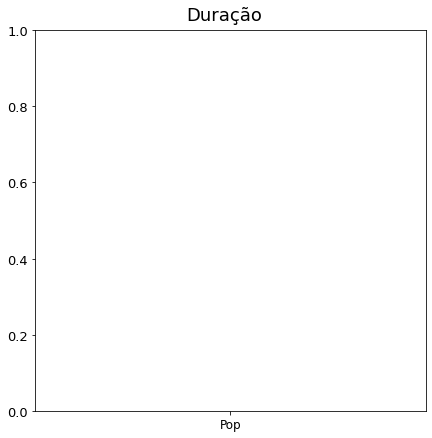

In [131]:
from collections import Counter
letter_counts = Counter(dfQualitativa['genero'])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df = df.reindex(index = ['Muito curta', 'Curta', 'Média', 'Longa', 'Muito longa'])
# df.plot(kind='bar')
fig = plt.figure(figsize =(7, 7))

fig.text(x=0.5,
    y=0.9, 
    s="Duração",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
plt.bar(df.index, [2, 22, 12, 13, 1], width=0.6, align='center', color='red', alpha=0.6, edgecolor='black')
# plt.savefig('duracao-barras.png', format='png')
plt.show()
# df.values.tolist()

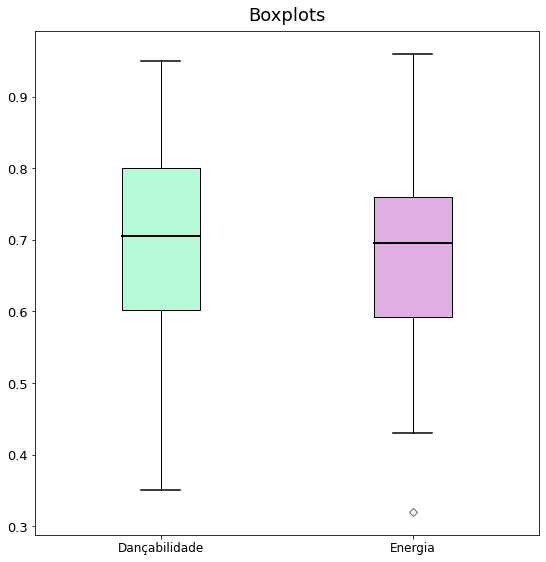

In [121]:
# Creating dataset
data = [dfQualitativa['dancabilidade'], dfQualitativa['energia']]

fig = plt.figure(figsize =(7, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Boxplots",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Dançabilidade', 'Energia'], widths=(0.31, 0.31), patch_artist=True)

colors = ['#B4FAD8', '#DFAFE3'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#000000', 
                linewidth = 1)
for cap in bp['caps']: 
    cap.set(color ='black', 
            linewidth = 1.5) 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 2) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='black', 
              alpha = 0.6) 
 

# show plot
# plt.savefig('boxplots.jpg', format='jpg')

plt.show()

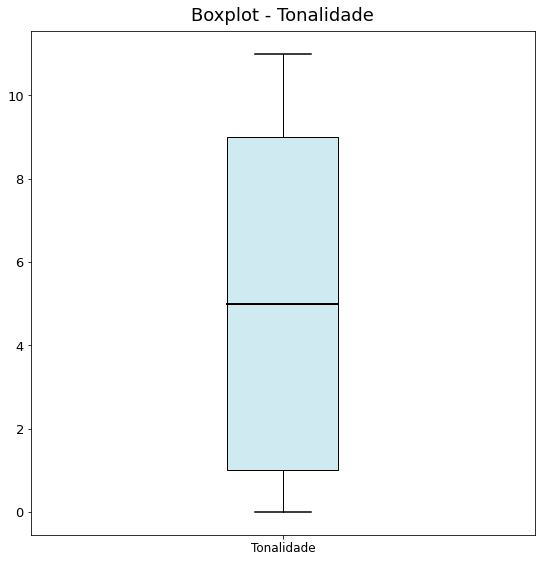

In [122]:
data = [dfQualitativa['tonalidade']]

fig = plt.figure(figsize =(7, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Boxplot - Tonalidade",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Tonalidade'], widths=(0.22),  patch_artist=True)

colors = ['#D0EAF2'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#000000', 
                linewidth = 1)
for cap in bp['caps']: 
    cap.set(color ='black', 
            linewidth = 1.5) 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 2) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='black', 
              alpha = 0.6) 
 

# plt.savefig('tonalidade-boxplot.png', format='png')
plt.show()

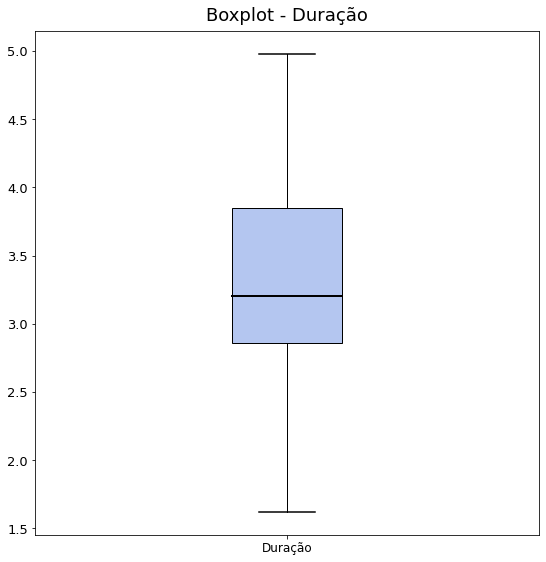

In [141]:
data = [dfQualitativa['duracao']]

fig = plt.figure(figsize =(7, 7))

fig.text(x=1.5,
    y=1.02, 
    s="Boxplot - Duração",
    fontsize = 18,
    horizontalalignment='center',
    color='black')
 
# Creating axes instance
ax = fig.add_axes([1, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, labels=['Duração'], widths=(0.22),  patch_artist=True)

colors = ['#b4c6f0'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#000000', 
                linewidth = 1)
for cap in bp['caps']: 
    cap.set(color ='black', 
            linewidth = 1.5) 
for median in bp['medians']: 
    median.set(color ='black', 
               linewidth = 2) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='black', 
              alpha = 0.6) 
 

# plt.savefig('tonalidade-boxplot.png', format='png')
plt.show()

In [124]:
dfTeste = dfVariaveis[['duracao']]
dfTeste['color'] = None
dfTeste.loc[dfTeste['duracao'] < 2, color] = 'red'
dfTeste.loc[(dfTeste['duracao'] >= 2) & (dfTeste['duracao'] < 3.15), color] = 'magenta'
# dfTeste.loc[(dfTeste['duracao'] > 2.7) & (dfTeste['duracao'] < 3.15), color] = 'magenta'
dfTeste.loc[(dfTeste['duracao'] >= 3.15) & (dfTeste['duracao'] < 3.7), color] = 'purple'
# dfTeste.loc[(dfTeste['duracao'] > 3.7) & (dfTeste['duracao'] < 4.2), color] = 'blue'
dfTeste.loc[(dfTeste['duracao'] >= 3.7) & (dfTeste['duracao'] < 4.5), color] = 'blue'
dfTeste.loc[dfTeste['duracao'] >= 4.5, color] = 'green'
cores = list(dfTeste['#D0EAF2'])

C:\Users\julia\AppData\Local\Temp\ipykernel_26200\388041746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTeste['color'] = None
C:\Users\julia\AppData\Local\Temp\ipykernel_26200\388041746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTeste.loc[dfTeste['duracao'] < 2, color] = 'red'


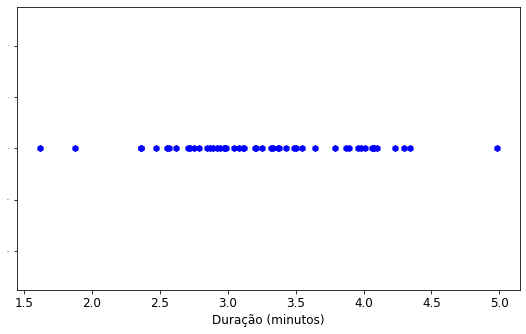

In [125]:
fig = plt.gcf()
fig.set_size_inches(9,13)
# fig.set_size_inches(8.3,15.7)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=0
plt.rcParams['axes.labelsize']=12
# fig.text(
#     x=0.5,
#     y=0.89,
#     s='Gráfico de Dispersão',
#     fontsize = 18,
#     horizontalalignment='center',
#     color='black')
gs = gridspec.GridSpec(2, 2, hspace=0.5,wspace=0.3)
plt.subplot(gs[0, :])
# colors = np.array(cores)
# plt.scatter(dfVariaveis['duracao'], dfVariaveis['duracao'], c=colors)
plt.plot(dfVariaveis['duracao'], len(dfVariaveis['duracao']) * [0], 'h', c='blue')
plt.xlabel("Duração (minutos)")
# plt.ylabel("Duração (minutos)")

plt.show()

In [126]:
colors = np.array(cores)
plt.scatter(dfVariaveis['duracao'], dfVariaveis['duracao'], c=colors)
plt.xlabel("Duração (m)")
plt.ylabel("Duração (m)")
plt.show()


NameError: name 'np' is not defined